In [1]:
gbData="""\
09062022 11.9
05072022 10.5
06102022 7.0
02022023 6.4
19062023 6.1
15092023 6.1
12032024 6.3
12062024 6.4
03102024 6.1
07022025 6.1\
"""

amcData="""\
22062022 11.4
31102022 6.9
06022023 6.4
16052023 6.2
09112023 6.2
16052024 6.0
30092024 6.1\
"""

In [2]:
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt
import datetime

In [3]:
dataGB={}
for l in gbData.split("\n"):
    k,v=l.split(" ")
    dataGB[k]=v

dataAMC={}
for l in amcData.split("\n"):
    k,v=l.split(" ")
    dataAMC[k]=v


In [4]:
dfMesuresGB=pd.DataFrame.from_dict(dataGB,orient="index",columns=["mesure-GB"],dtype="float")
dfMesuresGB.index=pd.to_datetime(dfMesuresGB.index,format="%d%m%Y")
dfMesuresAMC=pd.DataFrame.from_dict(dataAMC,orient="index",columns=["mesure-AMC"],dtype="float")
dfMesuresAMC.index=pd.to_datetime(dfMesuresAMC.index,format="%d%m%Y")
dfMesures=pd.concat([dfMesuresGB,dfMesuresAMC]).sort_index()
dfMesures

,mesure-GB,mesure-AMC
2022-06-09,11.9,NaN
2022-06-22,NaN,11.4
2022-07-05,10.5,NaN
2022-10-06,7.0,NaN
2022-10-31,NaN,6.9
2023-02-02,6.4,NaN
2023-02-06,NaN,6.4
2023-05-16,NaN,6.2
2023-06-19,6.1,NaN
2023-09-15,6.1,NaN


In [5]:
xticks=[]
for i in dfMesures.index:
    xticks.append(datetime.datetime.strftime(i, '%Y/%m/%d'))
xticks=sorted(xticks)

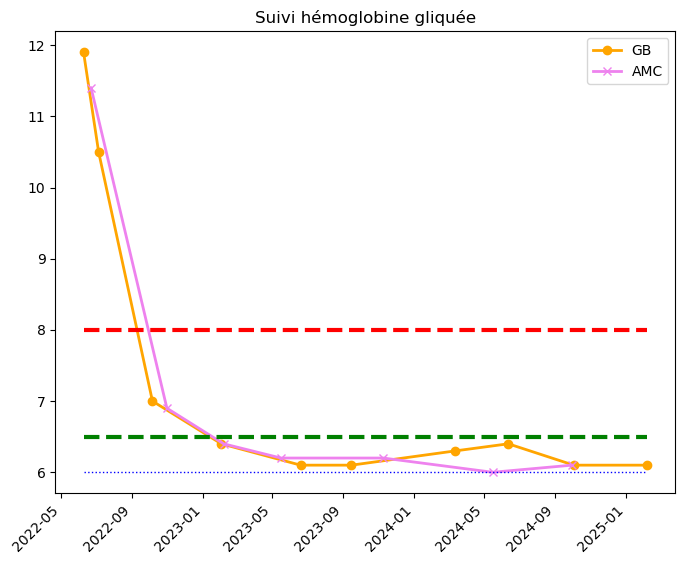

In [6]:
plt.figure(figsize=(8,6))
plt.plot(dfMesuresGB.index,dfMesuresGB["mesure-GB"],marker="o",color="orange",label="GB",linewidth=2)
plt.plot(dfMesuresAMC.index,dfMesuresAMC["mesure-AMC"],marker="x",color="violet",label="AMC",linewidth=2)
plt.plot([dfMesures.index.min(),dfMesures.index.max()],[8,8],linestyle="--",color="r",linewidth=3)
plt.plot([dfMesures.index.min(),dfMesures.index.max()],[6.5,6.5],linestyle="--",color="g",linewidth=3)
plt.plot([dfMesures.index.min(),dfMesures.index.max()],[6,6],linestyle=":",color="blue",linewidth=1)
plt.xticks(rotation=45,ha='right')
plt.legend()
plt.title("Suivi hémoglobine gliquée")
plt.show()

In [7]:
from bs4 import BeautifulSoup as bs
with open("/Users/gilles/Downloads/apple_health_export/export.xml", 'r') as inFile:
    data=inFile.read()
healthTree=bs(data, 'xml')

In [8]:
dRecord=set()
for record in healthTree.find_all("Record"):
    dRecord.add(record["type"])

In [9]:
dRecord

{'HKCategoryTypeIdentifierAppleStandHour',
 'HKCategoryTypeIdentifierAudioExposureEvent',
 'HKCategoryTypeIdentifierDiarrhea',
 'HKCategoryTypeIdentifierGeneralizedBodyAche',
 'HKCategoryTypeIdentifierHandwashingEvent',
 'HKCategoryTypeIdentifierHeadphoneAudioExposureEvent',
 'HKCategoryTypeIdentifierHighHeartRateEvent',
 'HKCategoryTypeIdentifierLowCardioFitnessEvent',
 'HKCategoryTypeIdentifierMindfulSession',
 'HKCategoryTypeIdentifierSleepAnalysis',
 'HKDataTypeSleepDurationGoal',
 'HKQuantityTypeIdentifierActiveEnergyBurned',
 'HKQuantityTypeIdentifierAppleExerciseTime',
 'HKQuantityTypeIdentifierAppleSleepingBreathingDisturbances',
 'HKQuantityTypeIdentifierAppleSleepingWristTemperature',
 'HKQuantityTypeIdentifierAppleStandTime',
 'HKQuantityTypeIdentifierAppleWalkingSteadiness',
 'HKQuantityTypeIdentifierBasalEnergyBurned',
 'HKQuantityTypeIdentifierBloodPressureDiastolic',
 'HKQuantityTypeIdentifierBloodPressureSystolic',
 'HKQuantityTypeIdentifierBodyFatPercentage',
 'HKQuant

In [10]:
bdData=[]
for bd in healthTree.find_all("Record", type="HKQuantityTypeIdentifierAppleSleepingBreathingDisturbances"):
    v=bd["value"]
    date=bd["startDate"]
    bdData.append([date,v])

In [11]:
df=pd.DataFrame(bdData)

In [12]:
df[0]=pd.to_datetime(df[0])

In [13]:
df[1]=pd.to_numeric(df[1])

In [14]:
df.head()

,0,1
0,2024-10-14 20:44:29+01:00,12.7809
1,2024-10-15 22:05:31+01:00,10.8216
2,2024-10-16 22:35:25+01:00,4.8290
3,2024-10-17 21:29:15+01:00,11.0889
4,2024-10-18 20:38:03+01:00,5.0846


In [27]:
minDate=df[0].min()
maxDate=df[0].max()
bdMean=df[1].mean()
bdStd=df[1].std()
bdInt1=bdMean+bdStd
bdInt2=bdMean+2*bdStd
bdInt3=bdMean+3*bdStd
outlying=bdMean+2.5*bdStd
factor=(df[1].max()-bdMean)/bdStd
print("moyenne %0.1f"%bdMean,"écart type %0.1f"%bdStd,"facteur du max %0.1f"%factor)
print("intervalle 1 %0.1f"%bdInt1)
print("intervalle 2 %0.1f"%bdInt2)
print("intervalle 3 %0.1f"%bdInt3)
print("μ+2.5σ %0.1f"%outlying)

moyenne 6.6 écart type 3.2 facteur du max 5.2
intervalle 1 9.8
intervalle 2 13.0
intervalle 3 16.1
μ+2.5σ 14.5


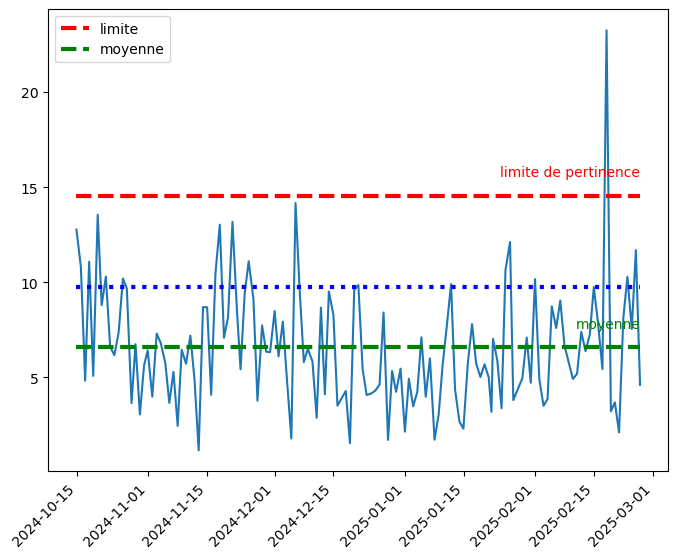

In [33]:
plt.figure(figsize=(8,6))
plt.plot(df[0],df[1])
plt.plot([df[0].min(),df[0].max()],[outlying,outlying],linestyle="--",color="r",linewidth=3,label="limite")
plt.plot([df[0].min(),df[0].max()],[bdMean,bdMean],linestyle="--",color="green",linewidth=3,label="moyenne")
plt.plot([df[0].min(),df[0].max()],[bdInt1,bdInt1],linestyle=":",color="blue",linewidth=3)
plt.text(maxDate,bdMean,"moyenne\n",verticalalignment='bottom',horizontalalignment="right",color="green")
plt.text(maxDate, outlying, "limite de pertinence\n",verticalalignment='bottom',horizontalalignment="right",color="red")
plt.xticks(rotation=45,ha='right')
plt.legend()
plt.savefig("RespProb-Timeline.png",bbox_inches="tight")
plt.show()

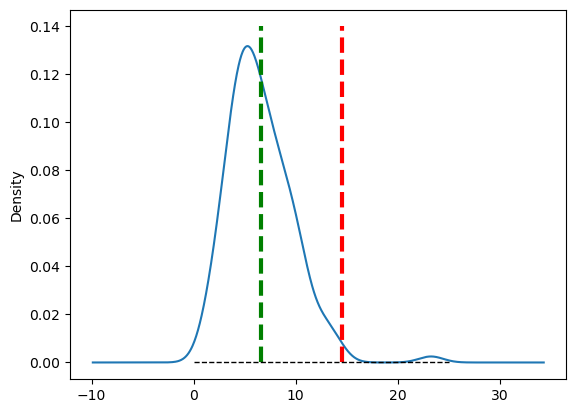

In [23]:
# df[1].plot.kde(bw_method=1)
df[1].plot.kde()
plt.plot([outlying,outlying],[0,0.14],linestyle="--",color="r",linewidth=3)
plt.plot([bdMean,bdMean],[0,0.14],linestyle="--",color="green",linewidth=3)
plt.plot([0,25],[0,0],linestyle="--",color="black",linewidth=1)


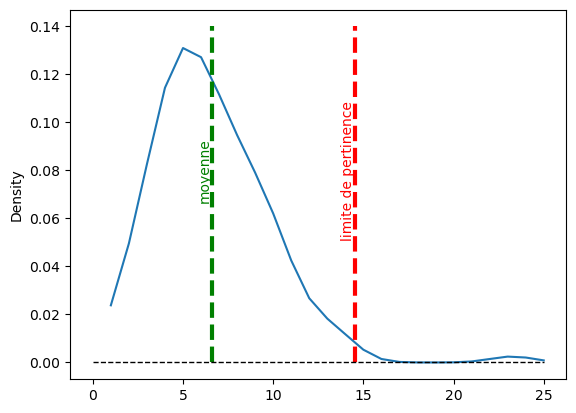

In [24]:
df[1].plot.kde(ind=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
plt.plot([outlying,outlying],[0,0.14],linestyle="--",color="r",linewidth=3)
plt.plot([bdMean,bdMean],[0,0.14],linestyle="--",color="green",linewidth=3)
plt.plot([0,25],[0,0],linestyle="--",color="black",linewidth=1)
plt.text(bdMean, 0.08, "moyenne", verticalalignment='center',horizontalalignment="right",color="green")
plt.text(outlying, 0.08, "limite de pertinence", rotation=90, verticalalignment='center',horizontalalignment="right",color="red")
plt.savefig("RespProb-KdeGraph.png",bbox_inches="tight")